# OpenClassrooms - Ingenieur IA
# Projet 3 - OpenFoodFact
# NETTOYAGE DES DONNEES

## Objectifs du projet : 
- **Rendre les données de santé publique plus accessibles**
- **Explorer et visualiser les données pour qu'elles soient utilisables**


## Plan :
**A - Exploration préliminaire du jeu de données**
- 1 - Chargement des données
- 2 - Exploration préliminaire des données avant nettoyage

**B - Démarche méthodologique de nettoyage de données**
- 1 - Traitement des doublons
- 2 - Traitement des valeurs manquantes
- 3 - Traitement des valeurs aberrantes et atypiques
- 4 - Traitement des types des colonnes
- 5 - Remplissage des valeurs manquantes
- 6 - Suppression des colonnes inutiles : selection des variables pertinentes pour l'analyse de données
- 7 - Structure des donnée pertinentes et nettoyées
- 8 - Sauvegarde des donnée pertinentes et nettoyées

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A - Présentation générale du jeu de données 

# 1 - Chargement des données

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv', delimiter='\t', low_memory=False)

## Type récupéré

In [3]:
type(df)

pandas.core.frame.DataFrame

## Copie des données

In [4]:
data = df.copy()

## Renommage des colonnes au format Python correct

In [5]:
data.columns = [col.replace("-", "_") for col in data.columns]
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2 - Exploration préliminaire des données avant nettoyage

## Volumétrie des données : nombre de lignes et de colonnes

In [6]:
data_size = data.shape
nb_rows = data_size[0]
nb_columns = data_size[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 320772
Nombre de colonnes : 162


### => Nombre d'individus = 320 772 / Nombre de variables = 162

## Description de la structure des données

In [7]:
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

In [8]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [9]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   code                                        object 
 1   url                                         object 
 2   creator                                     object 
 3   created_t                                   object 
 4   created_datetime                            object 
 5   last_modified_t                             object 
 6   last_modified_datetime                      object 
 7   product_name                                object 
 8   generic_name                                object 
 9   quantity                                    object 
 10  packaging                                   object 
 11  packaging_tags                              object 
 12  brands                                      object 
 13  brands_tags                 

In [10]:
data.dtypes.value_counts()

float64    106
object      56
dtype: int64

### => Premières remarques (avant nettoyage) :
- 106 variables quantitatives
- 56 variables qualitatives (catégorielles)

## Indicateurs statistiques pour les variables quantitatives

In [11]:
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

## Indicateurs statistiques pour les variables qualitatives

### Nombre de modalités

In [12]:
for col in data.select_dtypes('object'):
    print(col, " : ")
    print(data[col].nunique())
    print()

code  : 
320749

url  : 
320749

creator  : 
3535

created_t  : 
189567

created_datetime  : 
189568

last_modified_t  : 
180495

last_modified_datetime  : 
180495

product_name  : 
221347

generic_name  : 
38584

quantity  : 
13826

packaging  : 
14547

packaging_tags  : 
12064

brands  : 
58784

brands_tags  : 
50253

categories  : 
36982

categories_tags  : 
21142

categories_fr  : 
21152

origins  : 
4840

origins_tags  : 
4372

manufacturing_places  : 
7308

manufacturing_places_tags  : 
6736

labels  : 
18114

labels_tags  : 
13653

labels_fr  : 
13655

emb_codes  : 
8462

emb_codes_tags  : 
8158

first_packaging_code_geo  : 
1602

cities  : 
3

cities_tags  : 
2572

purchase_places  : 
5120

stores  : 
3259

countries  : 
1434

countries_tags  : 
725

countries_fr  : 
722

ingredients_text  : 
205520

allergens  : 
12939

allergens_fr  : 
19

traces  : 
8378

traces_tags  : 
3578

traces_fr  : 
3584

serving_size  : 
25423

additives  : 
196069

additives_tags  : 
41537

additiv

### Liste des modalités

In [13]:
for col in data.select_dtypes('object'):
    print(col, " : ")
    print(data[col].unique())
    print()

code  : 
['0000000003087' '0000000004530' '0000000004559' ... '9970229501521'
 '9980282863788' '999990026839']

url  : 
['http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao'
 'http://world-fr.openfoodfacts.org/produit/0000000004530/banana-chips-sweetened-whole'
 'http://world-fr.openfoodfacts.org/produit/0000000004559/peanuts-torn-glasser'
 ...
 'http://world-fr.openfoodfacts.org/produit/9970229501521/%E4%B9%90%E5%90%A7%E6%B3%A1%E8%8F%9C%E5%91%B3%E8%96%AF%E7%89%87-%E4%B9%90%E5%90%A7'
 'http://world-fr.openfoodfacts.org/produit/9980282863788/tomates-aux-vermicelles-knorr'
 'http://world-fr.openfoodfacts.org/produit/999990026839/sugar-free-drink-mix-peach-tea-market-pantry']

creator  : 
['openfoodfacts-contributors' 'usda-ndb-import' 'date-limite-app' ...
 'zmorlock' 'robopetr' 'mmarquesma']

created_t  : 
['1474103866' '1489069957' '1489055731' ... '1490631299' '1422099377'
 '1492340089']

created_datetime  : 
['2016-09-17T09:17:46Z' '2017-03-09T

[nan 'Blé, Beurre, Oeufs, Noisette'
 'Vollmilchpulver, Vollmilchpulver, Soja, Butterreinfett, Haselnusskerne, Soja, Mandeln, Pisatazien, Magermilchpulver'
 ... 'Poisson, Poisson' 'ORGE, CELERI' 'Milk, hazelnuts, NUTS, WHEAT']

allergens_fr  : 
[nan
 'http://fr.openfoodfacts.org/images/products/303/349/043/3864/front.3.200.jpg'
 'http://fr.openfoodfacts.org/images/products/303/349/059/4510/front.20.200.jpg'
 'http://fr.openfoodfacts.org/images/products/303/349/059/5517/front.4.200.jpg'
 'http://fr.openfoodfacts.org/images/products/303/349/061/8889/front.12.200.jpg'
 'http://fr.openfoodfacts.org/images/products/303/349/084/1782/front.9.200.jpg'
 'http://fr.openfoodfacts.org/images/products/303/349/085/3570/front.6.200.jpg'
 'http://fr.openfoodfacts.org/images/products/303/349/085/3587/front.9.200.jpg'
 'http://fr.openfoodfacts.org/images/products/303/349/085/3884/front.11.200.jpg'
 'http://fr.openfoodfacts.org/images/products/303/349/091/7418/front.10.200.jpg'
 'http://fr.openfoodfacts.o

[nan
 'http://fr.openfoodfacts.org/images/products/000/000/002/4600/front.3.200.jpg'
 'http://fr.openfoodfacts.org/images/products/000/000/002/7205/front.3.200.jpg'
 ... 'http://fr.openfoodfacts.org/images/products/9918/front.3.200.jpg'
 'http://fr.openfoodfacts.org/images/products/993/501/000/0003/front.6.200.jpg'
 'http://fr.openfoodfacts.org/images/products/997/022/950/1521/front.3.200.jpg']



### Nombre de données pour chaque modalité

In [14]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts())
    print()

6111251751338    1
3283260146061    1
9006900207007    1
0851614006410    1
0070552801110    1
                ..
0648912005081    1
0041268180509    1
7613269179245    1
5052449452488    1
0070784010861    1
Name: code, Length: 320749, dtype: int64

http://world-fr.openfoodfacts.org/produit/0075450126242/dark-cappuccino-drink-mix-hy-vee                                    1
http://world-fr.openfoodfacts.org/produit/0073866210104/shredded-sharp-cheddar-kings                                        1
http://world-fr.openfoodfacts.org/produit/3245413946850/ecrase-de-pomme-de-terre-et-jambon-carrefour-baby                   1
http://world-fr.openfoodfacts.org/produit/0610395931973/zacca-traditional-hummus-pine-tree-productions                      1
http://world-fr.openfoodfacts.org/produit/0758940527636/sandwich-cremes-cookies-vanilla-fairway                             1
                                                                                                                       

Name: categories_fr, Length: 21152, dtype: int64

France                                                   5171
España                                                    569
Italie                                                    473
Australia                                                 434
Union Européenne                                          428
                                                         ... 
Madagascar,Vallée de Sambirano                              1
Melton Mowbray,Angleterre,Royaume Uni                       1
Arroyito,Córdoba,Argentina                                  1
FAO 27,Atlantique Nord Est,Mer d'Irlande,Mer Celtique       1
Peaugres                                                    1
Name: origins, Length: 4840, dtype: int64

france                                                                                                                                         5303
union-europeenne                                                             

Carrefour                                           6465
Auchan                                              2869
Leclerc                                             2826
Cora                                                2274
Intermarché                                         2224
                                                    ... 
Bio Sainz                                              1
Carrefour,Intermarché,Système U,E.Leclerc,Auchan       1
Leclerc,carrefour,les restos du coeur                  1
Vigneron                                               1
www.Virgenextra.com                                    1
Name: stores, Length: 3259, dtype: int64

US                                                                         169928
France                                                                      77292
en:FR                                                                       16979
Suisse                                                                      12314
Deu

 [ extra-virgin-olive-oil -> en:extra-virgin-olive-oil  ]  [ virgin-olive-oil -> en:virgin-olive-oil  ]  [ olive-oil -> en:olive-oil  ]  [ oil -> en:oil  ]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

unknown                             22624
One-dish meals                       5546
Sweets                               4698
Biscuits and cakes                   4561
Non-sugared beverages                4302
Cereals                              4106
Cheese                               4024
Dressings and sauces                 3602
Milk and yogurt                      3297
Processed meat                       3247
Chocolate products                   3109
Alcoholic beverages                  2909

http://fr.openfoodfacts.org/images/products/351/269/000/3065/front.6.200.jpg    1
http://fr.openfoodfacts.org/images/products/308/021/000/2398/front.6.200.jpg    1
http://fr.openfoodfacts.org/images/products/325/039/042/7759/front.3.200.jpg    1
http://fr.openfoodfacts.org/images/products/23127104/front.4.200.jpg            1
http://fr.openfoodfacts.org/images/products/342/560/002/0017/front.3.200.jpg    1
                                                                               ..
http://fr.openfoodfacts.org/images/products/004/227/200/6021/front.3.200.jpg    1
http://fr.openfoodfacts.org/images/products/26014050/front.11.200.jpg           1
http://fr.openfoodfacts.org/images/products/315/525/000/5422/front.3.200.jpg    1
http://fr.openfoodfacts.org/images/products/848/001/700/6936/front.8.200.jpg    1
http://fr.openfoodfacts.org/images/products/303/349/095/8251/front.3.200.jpg    1
Name: image_small_url, Length: 75836, dtype: int64



# B - Démarche méthodologique de nettoyage des données

# 1 - Traitement des doublons

### Doublon ligne entière

In [15]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
320767    False
320768    False
320769    False
320770    False
320771    False
Length: 320772, dtype: bool

In [16]:
data.duplicated().sum()

0

In [17]:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(320772, 162)
(320772, 162)


### **=> Il n'y a pas de doublon de ligne entière**

### Doublon de la colonne 'code' 

In [18]:
print("Data shape avant suppression des doublons 'code' : ", data.shape)
data.drop_duplicates(subset=["code"], inplace=True)
print("Data shape après suppression des doublons 'code' : ", data.shape)

Data shape avant suppression des doublons 'code' :  (320772, 162)
Data shape après suppression des doublons 'code' :  (320750, 162)


### Doublon des colonnes 'brands' + 'product_name'

In [19]:
print("Data shape avant suppression des doublons 'brands' + 'product_name' : ", data.shape)
data.drop_duplicates(subset=["brands", "product_name"], inplace=True)
print("Data shape après suppression des doublons 'brands' + 'product_name' : ", data.shape)

Data shape avant suppression des doublons 'brands' + 'product_name' :  (320750, 162)
Data shape après suppression des doublons 'brands' + 'product_name' :  (283629, 162)


# 2 - Traitement des valeurs manquantes

In [20]:
data.isna()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy_from_fat_100g,fat_100g,saturated_fat_100g,butyric_acid_100g,caproic_acid_100g,caprylic_acid_100g,capric_acid_100g,lauric_acid_100g,myristic_acid_100g,palmitic_acid_100g,stearic_acid_100g,arachidic_acid_100g,behenic_acid_100g,lignoceric_acid_100g,cerotic_acid_100g,montanic_acid_100g,melissic_acid_100g,monounsaturated_fat_100g,polyunsaturated_fat_100g,omega_3_fat_100g,alpha_linolenic_acid_100g,eicosapentaenoic_acid_100g,docosahexaenoic_acid_100g,omega_6_fat_100g,linoleic_acid_100g,arachidonic_acid_100g,gamma_linolenic_acid_100g,dihomo_gamma_linolenic_acid_100g,omega_9_fat_100g,oleic_acid_100g,elaidic_acid_100g,gondoic_acid_100g,mead_acid_100g,erucic_acid_100g,nervonic_acid_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum_proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin_a_100g,beta_carotene_100g,vitamin_d_100g,vitamin_e_100g,vitamin_k_100g,vitamin_c_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_pp_100g,vitamin_b6_100g,vitamin_b9_100g,folates_100g,vitamin_b12_100g,biotin_100g,pantothenic_acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,glycemic_index_100g,water_hardness_100g
0,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,True,True,False,True,False,False,True,True,False,True,True,False,True,True,True,False,True,True,False,False,False,True,True,True,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,

## Identification des données manquantes

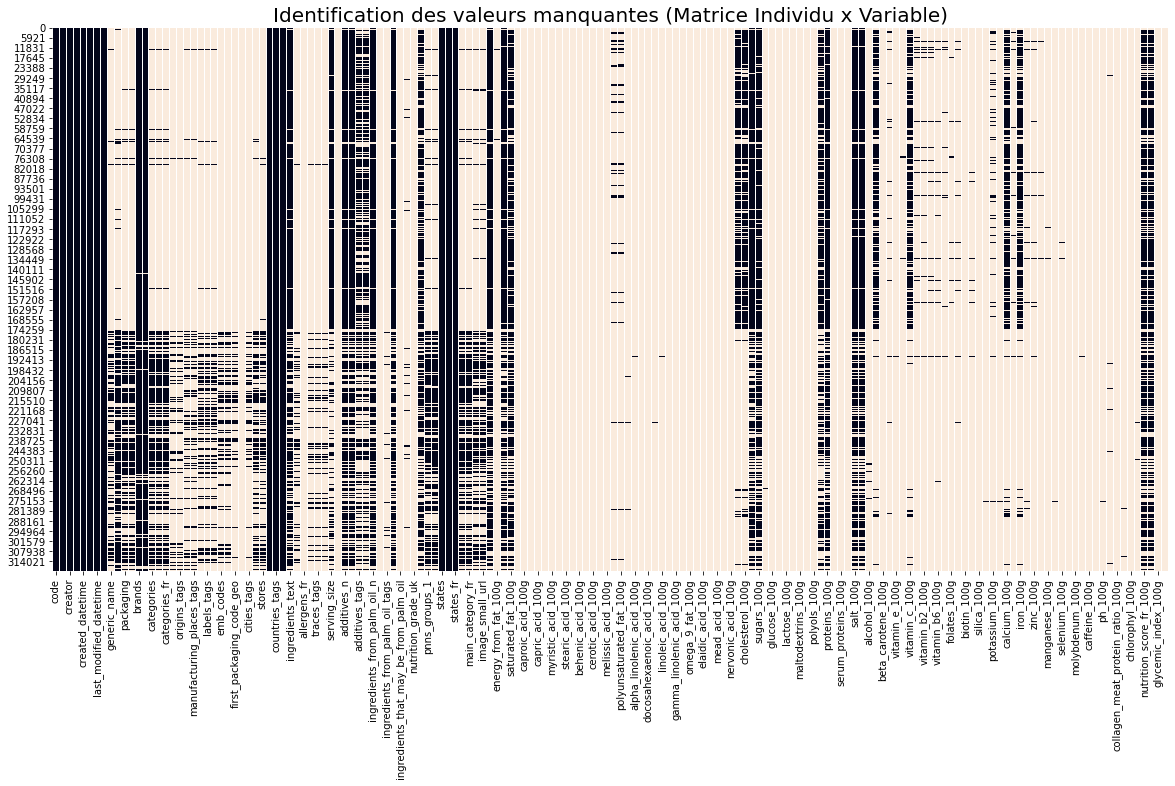

In [21]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes (Matrice Individu x Variable)", fontsize=20)
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [22]:
total_missing_value_number = data.isna().sum().sum()
print("Nombre total de valeurs manquantes dans le dataset = ", total_missing_value_number)

Nombre total de valeurs manquantes dans le dataset =  34689612


In [23]:
missing_value_number_per_column = data.isna().sum().sort_values(ascending=False)
print("Nombre de valeurs manquantes par colonne :")
missing_value_number_per_column

Nombre de valeurs manquantes par colonne :


water_hardness_100g                           283629
nervonic_acid_100g                            283629
no_nutriments                                 283629
ingredients_from_palm_oil                     283629
ingredients_that_may_be_from_palm_oil         283629
nutrition_grade_uk                            283629
butyric_acid_100g                             283629
caproic_acid_100g                             283629
lignoceric_acid_100g                          283629
cerotic_acid_100g                             283629
glycemic_index_100g                           283629
elaidic_acid_100g                             283629
gondoic_acid_100g                             283629
mead_acid_100g                                283629
erucic_acid_100g                              283629
melissic_acid_100g                            283629
chlorophyl_100g                               283629
myristic_acid_100g                            283628
behenic_acid_100g                             

In [24]:
total_percentage_missing_value = (data.isna().sum().sum() / data.size)
print("Pourcentage total de valeurs manquantes dans le dataset = ", total_percentage_missing_value)

Pourcentage total de valeurs manquantes dans le dataset =  0.7549771264835662


In [25]:
missing_value_percentage_per_column = (data.isna().sum() / data.shape[0]).sort_values(ascending=False)
print("Pourcentage de valeurs manquantes par colonne : ")
missing_value_percentage_per_column

Pourcentage de valeurs manquantes par colonne : 


water_hardness_100g                           1.000000
nervonic_acid_100g                            1.000000
no_nutriments                                 1.000000
ingredients_from_palm_oil                     1.000000
ingredients_that_may_be_from_palm_oil         1.000000
nutrition_grade_uk                            1.000000
butyric_acid_100g                             1.000000
caproic_acid_100g                             1.000000
lignoceric_acid_100g                          1.000000
cerotic_acid_100g                             1.000000
glycemic_index_100g                           1.000000
elaidic_acid_100g                             1.000000
gondoic_acid_100g                             1.000000
mead_acid_100g                                1.000000
erucic_acid_100g                              1.000000
melissic_acid_100g                            1.000000
chlorophyl_100g                               1.000000
myristic_acid_100g                            0.999996
behenic_ac

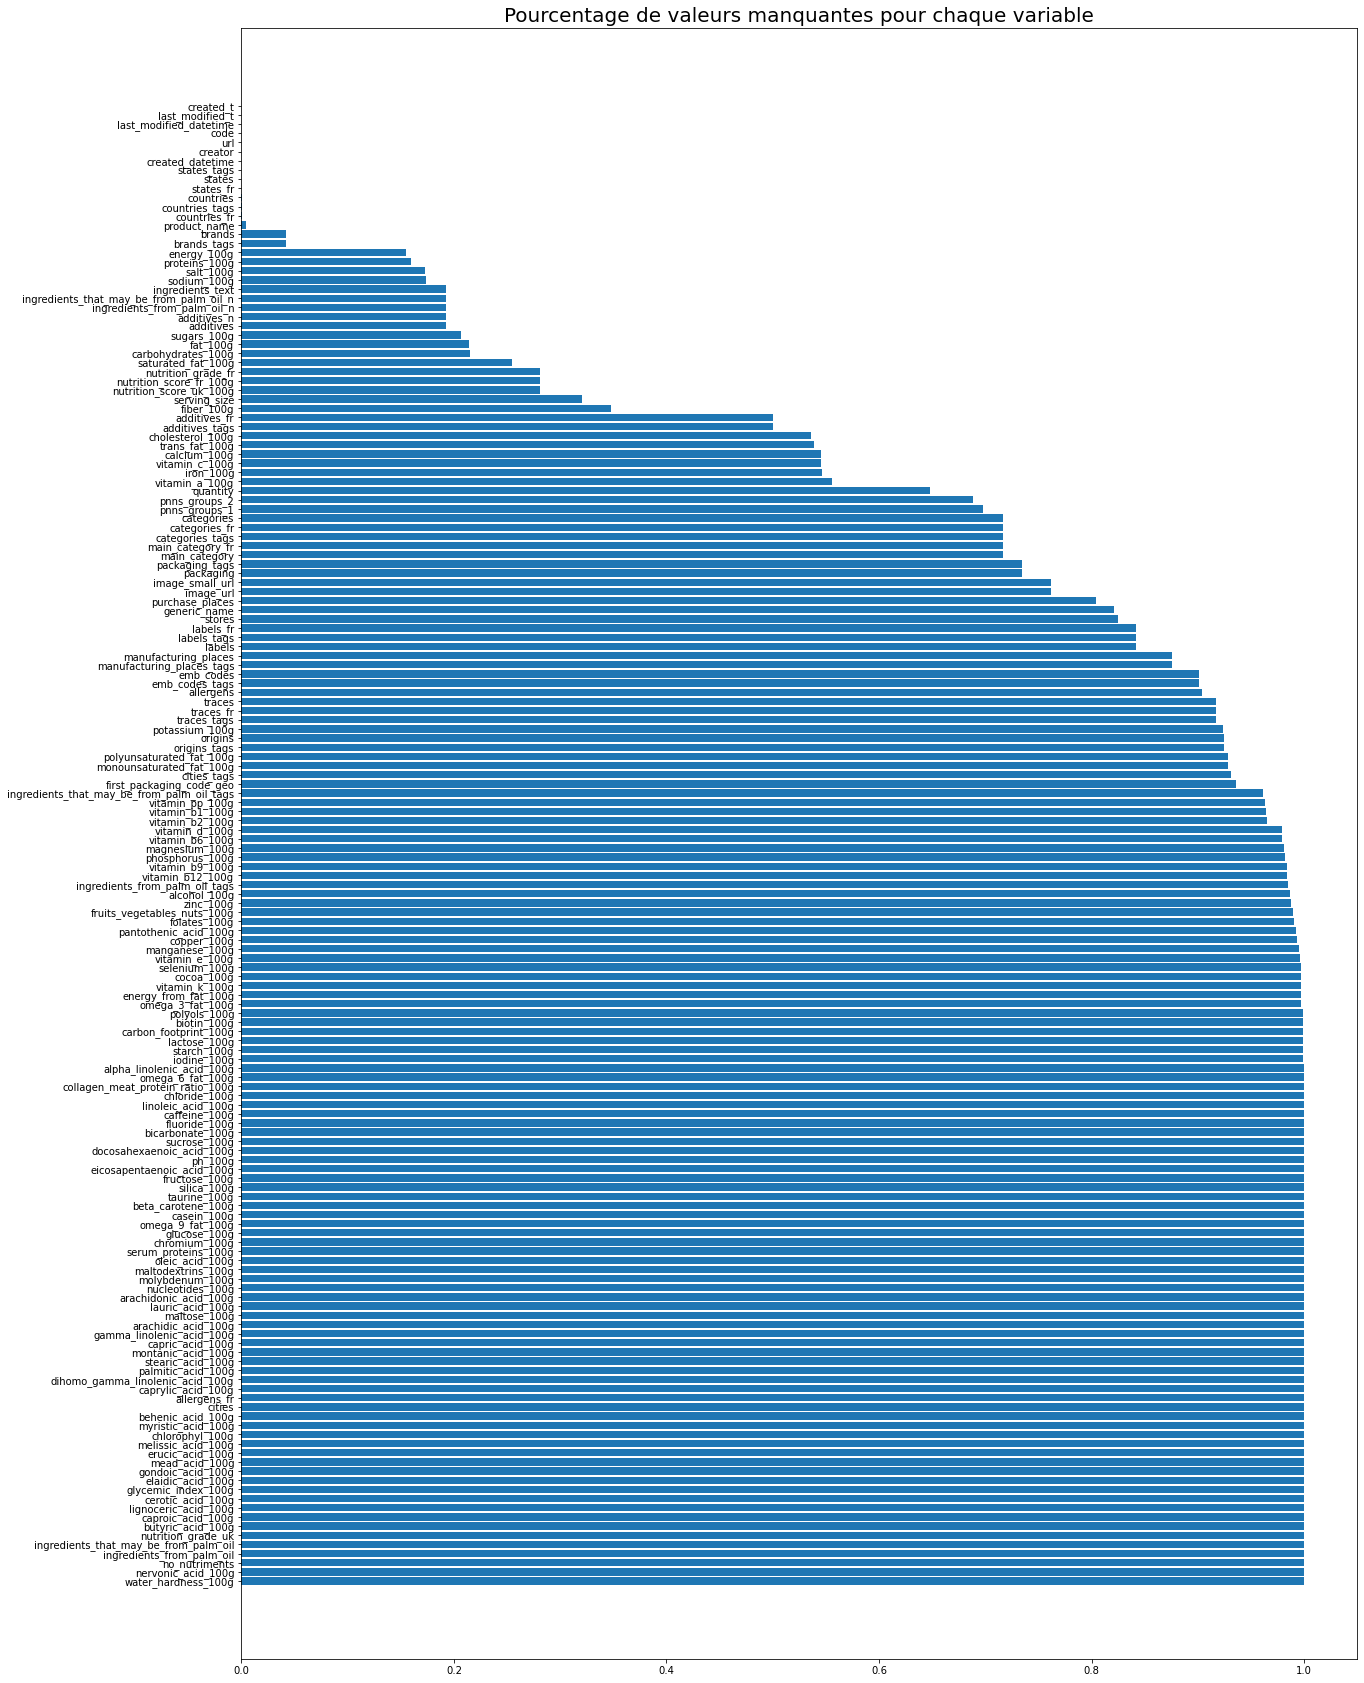

In [26]:
plt.figure(figsize=(20,30))
plt.barh(missing_value_percentage_per_column.index, missing_value_percentage_per_column.values)
plt.title("Pourcentage de valeurs manquantes pour chaque variable", fontsize=20)
plt.show()

## Suppression des données manquantes

### Suppression des colonnes avec trop de données manquantes : taux de valeur manquante maximum = 40%

In [27]:
missing_value_percentage_per_column > 0.4

water_hardness_100g                            True
nervonic_acid_100g                             True
no_nutriments                                  True
ingredients_from_palm_oil                      True
ingredients_that_may_be_from_palm_oil          True
nutrition_grade_uk                             True
butyric_acid_100g                              True
caproic_acid_100g                              True
lignoceric_acid_100g                           True
cerotic_acid_100g                              True
glycemic_index_100g                            True
elaidic_acid_100g                              True
gondoic_acid_100g                              True
mead_acid_100g                                 True
erucic_acid_100g                               True
melissic_acid_100g                             True
chlorophyl_100g                                True
myristic_acid_100g                             True
behenic_acid_100g                              True
cities      

In [28]:
colums_too_empty = missing_value_percentage_per_column[missing_value_percentage_per_column > 0.4].index
colums_too_empty

Index(['water_hardness_100g', 'nervonic_acid_100g', 'no_nutriments',
       'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil',
       'nutrition_grade_uk', 'butyric_acid_100g', 'caproic_acid_100g',
       'lignoceric_acid_100g', 'cerotic_acid_100g',
       ...
       'pnns_groups_2', 'quantity', 'vitamin_a_100g', 'iron_100g',
       'vitamin_c_100g', 'calcium_100g', 'trans_fat_100g', 'cholesterol_100g',
       'additives_tags', 'additives_fr'],
      dtype='object', length=128)

In [29]:
data.drop(columns = colums_too_empty, inplace=True)
data.shape

(283629, 34)

### Après suppression des colonnes avec trop de données manquantes

In [30]:
data.shape

(283629, 34)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283629 entries, 0 to 320771
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     283628 non-null  object 
 1   url                                      283628 non-null  object 
 2   creator                                  283628 non-null  object 
 3   created_t                                283629 non-null  object 
 4   created_datetime                         283627 non-null  object 
 5   last_modified_t                          283629 non-null  object 
 6   last_modified_datetime                   283629 non-null  object 
 7   product_name                             282487 non-null  object 
 8   brands                                   271628 non-null  object 
 9   brands_tags                              271620 non-null  object 
 10  countries                       

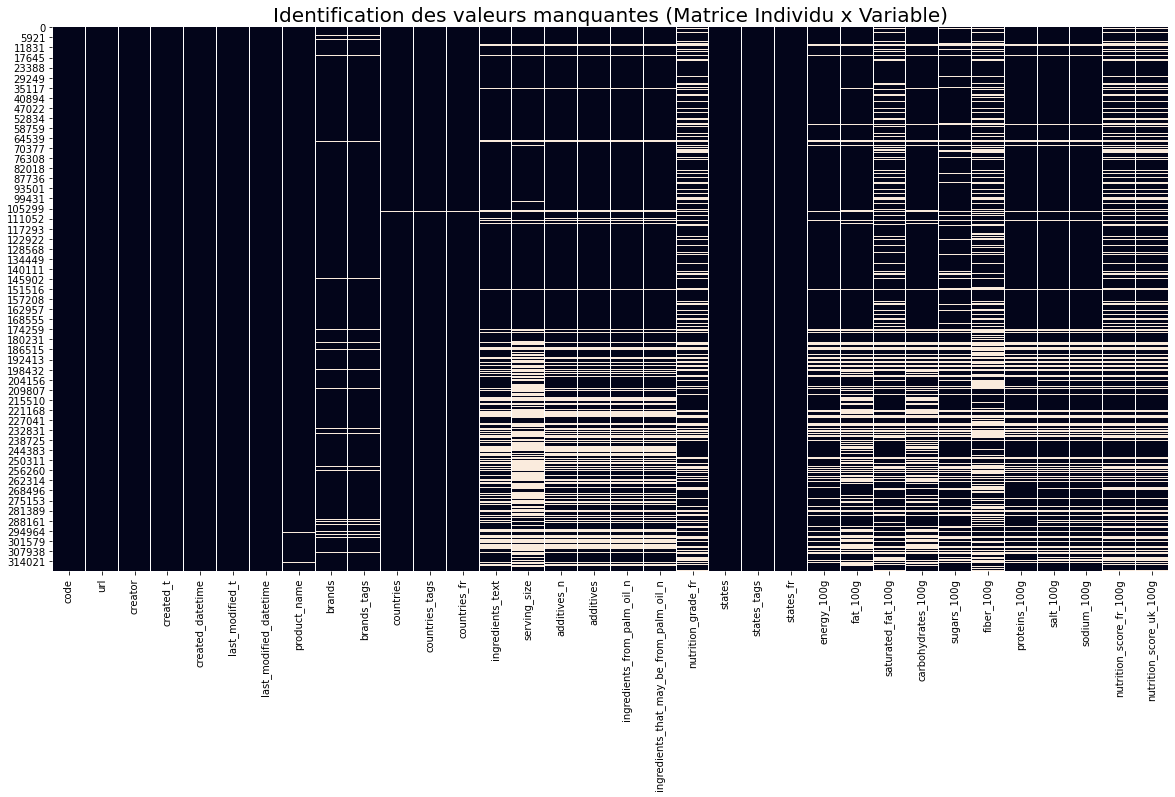

In [32]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes (Matrice Individu x Variable)", fontsize=20)
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [33]:
total_percentage_nan_value = (data.isna().sum().sum() / data.size)
print("Pourcentage total de valeurs manquantes dans le dataset = ", total_percentage_nan_value)

Pourcentage total de valeurs manquantes dans le dataset =  0.12113494160660997


In [34]:
nan_value_percentage_per_column = (data.isna().sum() / data.shape[0]).sort_values(ascending=False)
print("Pourcentage de valeurs manquantes par colonne : ")
nan_value_percentage_per_column

Pourcentage de valeurs manquantes par colonne : 


fiber_100g                                 0.347940
serving_size                               0.320824
nutrition_score_uk_100g                    0.280994
nutrition_score_fr_100g                    0.280994
nutrition_grade_fr                         0.280994
saturated_fat_100g                         0.255016
carbohydrates_100g                         0.215253
fat_100g                                   0.214146
sugars_100g                                0.206569
additives                                  0.192784
ingredients_that_may_be_from_palm_oil_n    0.192674
ingredients_from_palm_oil_n                0.192674
additives_n                                0.192674
ingredients_text                           0.192671
sodium_100g                                0.173346
salt_100g                                  0.173209
proteins_100g                              0.159197
energy_100g                                0.155330
brands_tags                                0.042341
brands      

### Suppression des lignes avec beaucoup de données manquantes

In [35]:
# On ajoute une colonne au DataFrame avec le taux de remplissage par ligne (on travaille sur l'axis=1)

In [36]:
data["taux_remplissage"] = data.notna().sum(axis=1) / data.shape[1]
data["taux_remplissage"]

0         0.470588
1         0.941176
2         1.000000
3         1.000000
4         0.794118
            ...   
320767    0.470588
320768    1.000000
320769    0.470588
320770    0.470588
320771    0.852941
Name: taux_remplissage, Length: 283629, dtype: float64

<AxesSubplot:title={'center':'Taux de remplissage des lignes'}, ylabel='Frequency'>

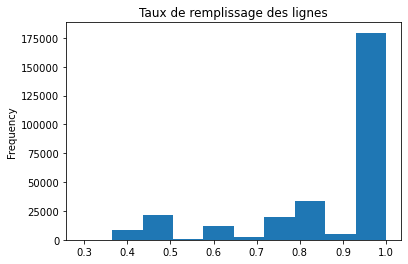

In [37]:
data["taux_remplissage"].sort_values().plot(kind='hist', title="Taux de remplissage des lignes")

In [38]:
data = data[data["taux_remplissage"] > 0.4]
data.drop(columns=["taux_remplissage"], inplace=True) #On supprime la colone taux_remplissage que l'on avait ajoutée
data.shape

(283493, 34)

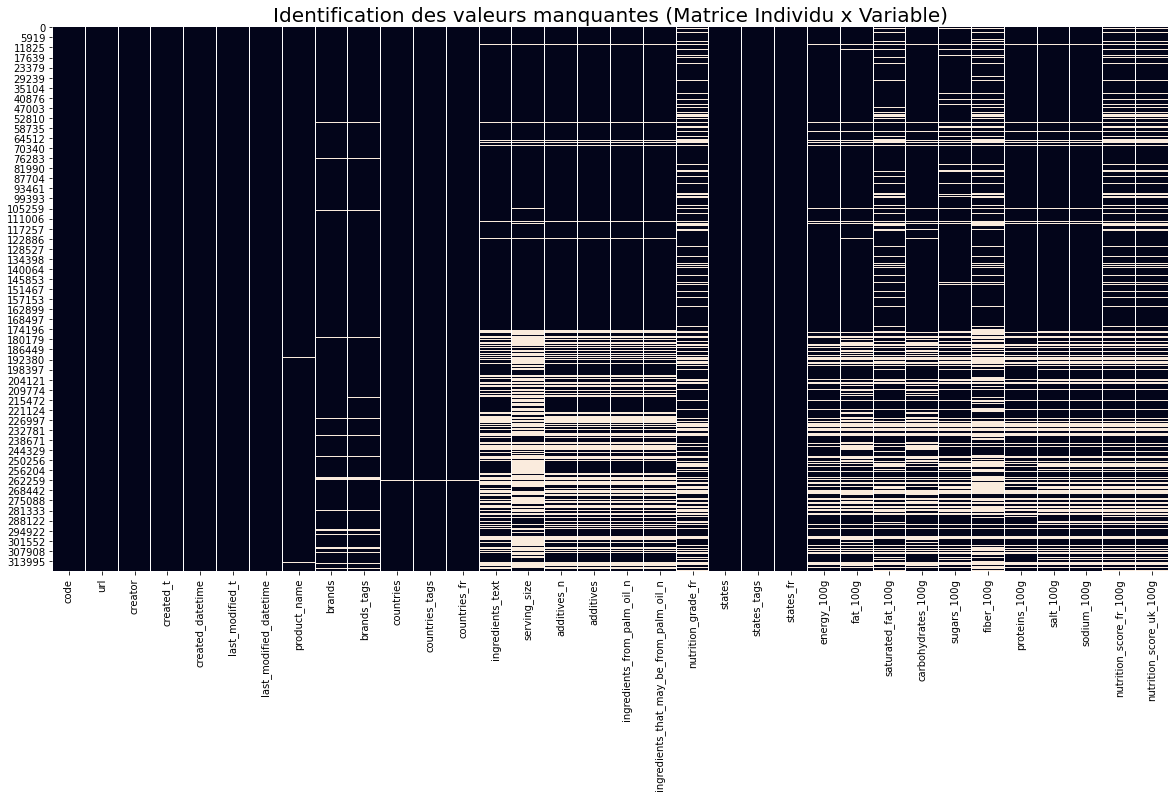

In [39]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes (Matrice Individu x Variable)", fontsize=20)
sns.heatmap(data.isna(), cbar=False)
plt.show()

### => Il y a moins de lignes creuses

### **Après suppression des données manquantes**

In [40]:
data.shape

(283493, 34)

In [41]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283493 entries, 0 to 320771
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     283493 non-null  object 
 1   url                                      283493 non-null  object 
 2   creator                                  283492 non-null  object 
 3   created_t                                283493 non-null  object 
 4   created_datetime                         283492 non-null  object 
 5   last_modified_t                          283493 non-null  object 
 6   last_modified_datetime                   283493 non-null  object 
 7   product_name                             282355 non-null  object 
 8   brands                                   271545 non-null  object 
 9   brands_tags                              271537 non-null  object 
 10  countries                       

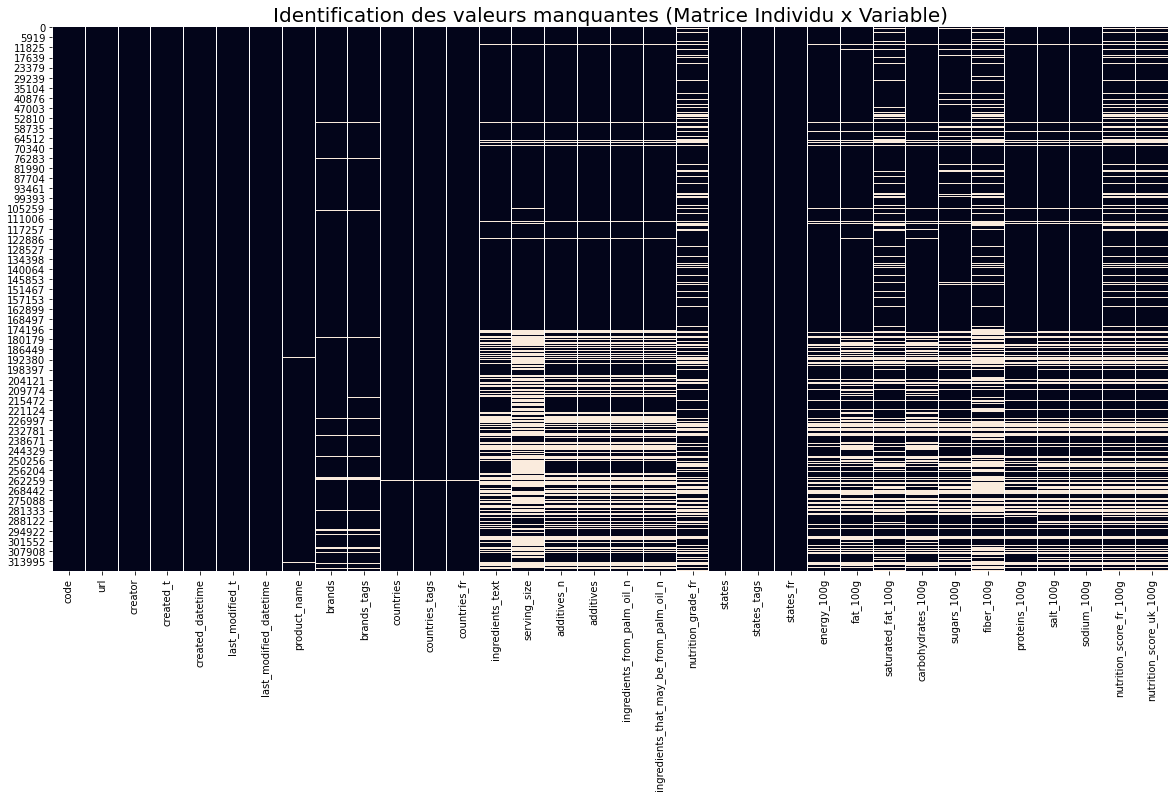

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.title("Identification des valeurs manquantes (Matrice Individu x Variable)", fontsize=20)
plt.show()

# 3 - Traitement des valeurs aberrantes et atypiques

In [44]:
data_cleaned = data.copy(deep=True) #Sauvegarde des données avant nettoyage

## Traitement Métier des valeurs aberrantes

 ### Identification Métier des valeurs aberrantes

#### Etude Métier : d'après des recherches sur Internet :
#### - pour l'énegie : la substance ayant le plus d'énergie sont les lipides avec 3700kJ pour 100g 
#### -> les valeurs supérieures sont considérées comme étant aberrantes
#### - pour les nutriments : la quantité de nutriment pour 100g de produit ne peut pas dépasser 100g 
#### -> les valeurs supérieures sont considérées comme étant aberrantes

### Energy

<AxesSubplot:title={'center':"Boxplot pour l'énergie avant nettoyage métier"}>

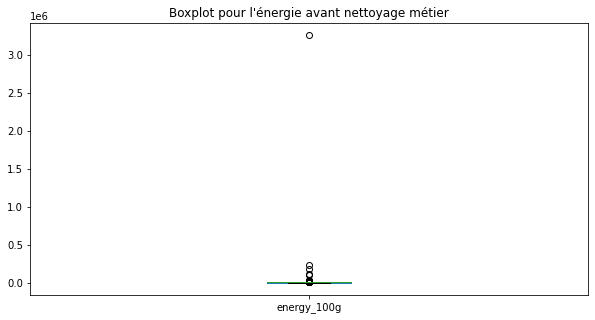

In [45]:
data['energy_100g'].plot.box(figsize=(10, 5), title="Boxplot pour l'énergie avant nettoyage métier")

### Nutriments

In [46]:
columns_to_exclude = ['nutrition_score_fr_100g', 'nutrition_score_uk_100g', 'energy_100g']

In [47]:
nutriments = [col for col in data.columns if col.endswith('_100g') and col not in columns_to_exclude]
nutriments

['fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

Text(0.5, 1.0, 'Boxplots pour les nutriments avant nettoyage métier')

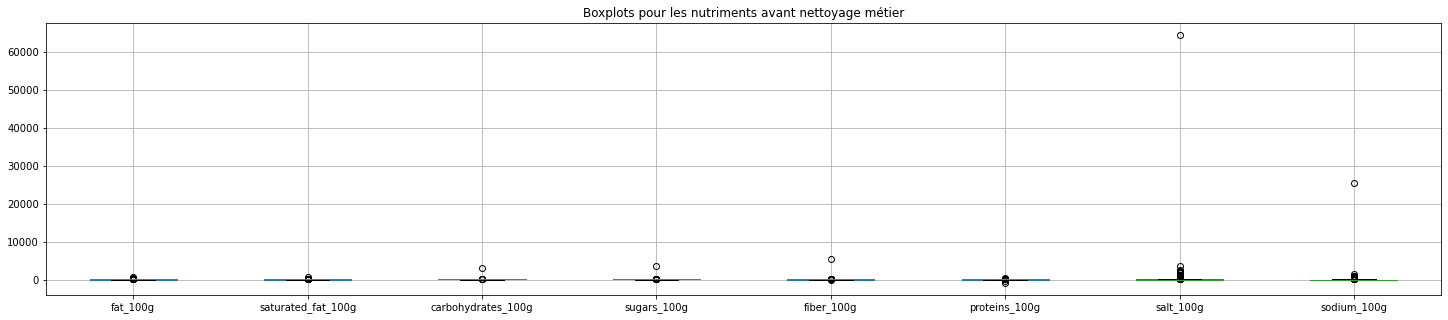

In [48]:
data.boxplot(column=nutriments, figsize=(25, 5))
plt.title("Boxplots pour les nutriments avant nettoyage métier")

### Nettoyage métier de l'énergie

In [49]:
data_cleaned = data_cleaned [(data_cleaned['energy_100g'] > 0) & (data_cleaned['energy_100g'] < 3700)]
print("Avant nettoyage métier : ", data.shape)
print("Après nettoyage métier : ", data_cleaned.shape)

Avant nettoyage métier :  (283493, 34)
Après nettoyage métier :  (230737, 34)


[Text(0.5, 1.0, "Boxplot pour l'énergie après nettoyage métier")]

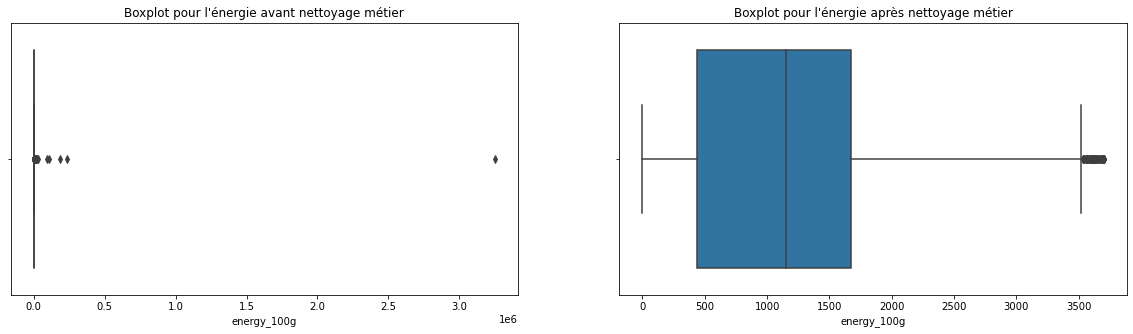

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.boxplot(x=data['energy_100g'], ax=axes[0]).set(title="Boxplot pour l'énergie avant nettoyage métier")
sns.boxplot(x=data_cleaned['energy_100g'], ax=axes[1]).set(title="Boxplot pour l'énergie après nettoyage métier")

### Nettoyage métier des nutriments

In [51]:
for col in nutriments:
    data_cleaned = data_cleaned.query(f"{col} >= 0 and {col} <= 100")
    print(col, " -> ", data_cleaned.shape)

fat_100g  ->  (213353, 34)
saturated_fat_100g  ->  (191527, 34)
carbohydrates_100g  ->  (191045, 34)
sugars_100g  ->  (186318, 34)
fiber_100g  ->  (161059, 34)
proteins_100g  ->  (160728, 34)
salt_100g  ->  (160098, 34)
sodium_100g  ->  (160095, 34)


Text(0.5, 1.0, 'Boxplots pour les nutriments après nettoayage métier')

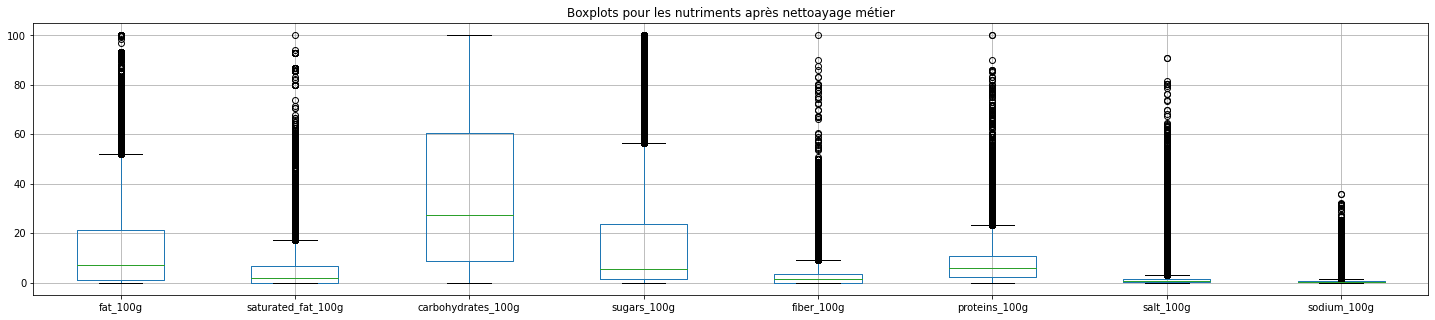

In [52]:
data_cleaned.boxplot(column=nutriments, figsize=(25, 5))
plt.title("Boxplots pour les nutriments après nettoayage métier")

## Traitement Statistique des valeurs atypiques

### Identification Statistique des valeurs atypiques

In [53]:
def remove_outliers(col, df):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df.query(f"{col} >= {q1-1.5*iqr} and {col} <= {q3+1.5*iqr}")

 ### Suppression Statistique des valeurs atypiques

### Energy

In [54]:
data_cleaned = remove_outliers('energy_100g', data_cleaned)
data_cleaned.shape

(160083, 34)

<AxesSubplot:title={'center':"Boxplot pour l'énergie après nettoyage statistique"}>

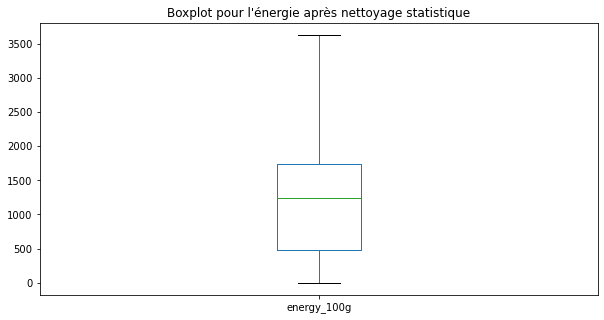

In [55]:
data_cleaned['energy_100g'].plot.box(figsize=(10, 5), title="Boxplot pour l'énergie après nettoyage statistique")

### Nutriments

In [56]:
for col in nutriments:
    data_cleaned = remove_outliers(col, data_cleaned)
    print(col, ' -> ', data_cleaned.shape)

fat_100g  ->  (156516, 34)
saturated_fat_100g  ->  (145490, 34)
carbohydrates_100g  ->  (145490, 34)
sugars_100g  ->  (136014, 34)
fiber_100g  ->  (126784, 34)
proteins_100g  ->  (121328, 34)
salt_100g  ->  (115484, 34)
sodium_100g  ->  (114058, 34)


Text(0.5, 1.0, 'Boxplots pour les nutriments après nettoyage statistique')

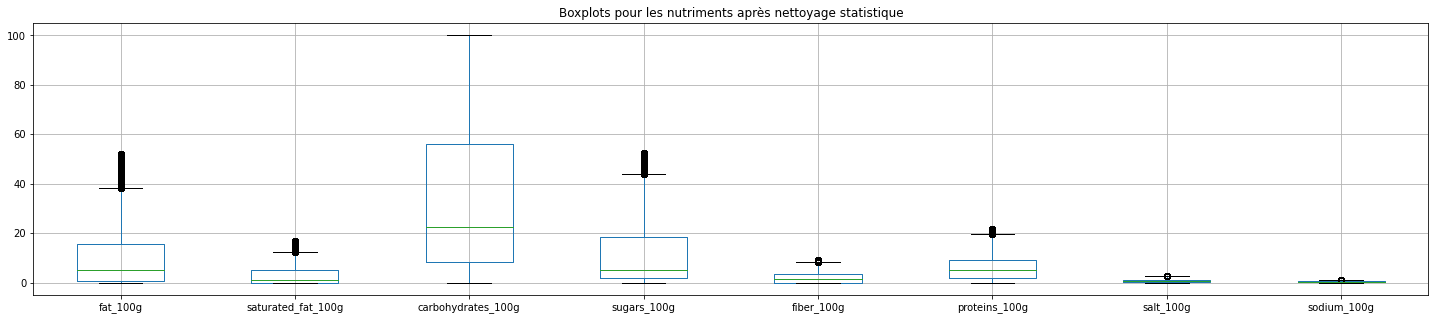

In [57]:
data_cleaned.boxplot(column=nutriments, figsize=(25,5))
plt.title("Boxplots pour les nutriments après nettoyage statistique")

### -> Les distributions sont plus homogènes et plus compactes étant donné que les valeurs rares ont été supprimées

### Traitement des 'nutrition_score_fr_100g' et 'nutrition_score_uk_100g'

In [58]:
data_cleaned['nutrition_score_fr_100g'].describe()

count    113890.000000
mean          6.587567
std           8.467469
min         -14.000000
25%           0.000000
50%           4.000000
75%          13.000000
max          36.000000
Name: nutrition_score_fr_100g, dtype: float64

<AxesSubplot:>

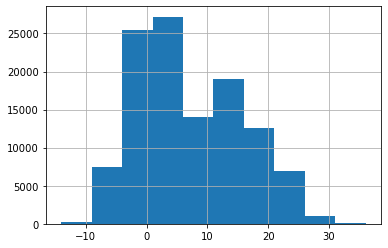

In [59]:
data_cleaned['nutrition_score_fr_100g'].hist()

In [60]:
data_cleaned['nutrition_score_uk_100g'].describe()

count    113890.000000
mean          6.446220
std           8.509306
min         -14.000000
25%           0.000000
50%           4.000000
75%          13.000000
max          36.000000
Name: nutrition_score_uk_100g, dtype: float64

<AxesSubplot:>

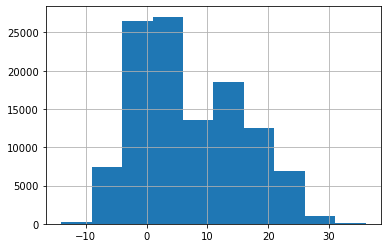

In [61]:
data_cleaned['nutrition_score_uk_100g'].hist()

### -> Pas de valeurs aberrantes : échelle de -15 à 40

# 4 - Traitement des types des colonnes

In [62]:
data_cleaned.dtypes.value_counts()

object     20
float64    14
dtype: int64

In [63]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114058 entries, 2 to 320763
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     114058 non-null  object 
 1   url                                      114058 non-null  object 
 2   creator                                  114058 non-null  object 
 3   created_t                                114058 non-null  object 
 4   created_datetime                         114058 non-null  object 
 5   last_modified_t                          114058 non-null  object 
 6   last_modified_datetime                   114058 non-null  object 
 7   product_name                             113907 non-null  object 
 8   brands                                   112720 non-null  object 
 9   brands_tags                              112720 non-null  object 
 10  countries                       

## Traitement des colonnes avec des dates

In [64]:
data_cleaned['created_datetime'] = pd.to_datetime(data_cleaned['created_datetime'], format="%Y-%m-%dT%H:%M:%SZ")

In [65]:
data_cleaned['last_modified_datetime'] = pd.to_datetime(data_cleaned['last_modified_datetime'], format="%Y-%m-%dT%H:%M:%SZ")

In [66]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114058 entries, 2 to 320763
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     114058 non-null  object        
 1   url                                      114058 non-null  object        
 2   creator                                  114058 non-null  object        
 3   created_t                                114058 non-null  object        
 4   created_datetime                         114058 non-null  datetime64[ns]
 5   last_modified_t                          114058 non-null  object        
 6   last_modified_datetime                   114058 non-null  datetime64[ns]
 7   product_name                             113907 non-null  object        
 8   brands                                   112720 non-null  object        
 9   brands_tags               

In [67]:
data_cleaned.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37,1489069957,2017-03-09 14:32:37,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
12,0000000016872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055650,2017-03-09 10:34:10,1489055651,2017-03-09 10:34:11,Zen Party Mix,Sunridge,sunridge,US,en:united-states,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),1.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0,12.0
20,0000000018265,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055706,2017-03-09 10:35:06,1489055706,2017-03-09 10:35:06,Energy Power Mix,Sunridge,sunridge,US,en:united-states,États-Unis,"Yogurt raisins, tamari roasted almonds, organi...",40 g (0.25 cup),0.0,[ yogurt-raisins -> en:yogurt-raisins ] [ r...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1464.0,17.50,7.50,42.50,32.50,5.0,7.50,0.28448,0.112,14.0,14.0
21,0000000018289,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055654,2017-03-09 10:34:14,1489055655,2017-03-09 10:34:15,Antioxidant Mix - Berries & Chocolate,Sunridge,sunridge,US,en:united-states,États-Unis,"Chocolate stars (dehydrated cane juice, sweete...",30 g (0.25 cup),1.0,[ chocolate-stars -> en:chocolate-stars ] [...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2092.0,33.33,6.67,46.67,30.00,6.7,13.33,0.46482,0.183,15.0,15.0
24,0000000018357,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489138486,2017-03-10 09:34:46,1489138486,2017-03-10 09:34:46,Peanut Butter Power Chews,Sunridge,sunridge,US,en:united-states,États-Unis,"Peanut butter (dry roasted peanuts, palm oil, ...",45 g (45 GRM),3.0,[ peanut-butter -> en:peanut-butter ] [ but...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1954.0,20.00,2.22,60.00,33.33,4.4,8.89,0.19812,0.078,9.0,9.0


In [68]:
data_cleaned.dtypes.value_counts()

object            18
float64           14
datetime64[ns]     2
dtype: int64

## Changement des variables de type Object -> type Category

In [69]:
for col in data_cleaned.select_dtypes('object'):
    print(col)

code
url
creator
created_t
last_modified_t
product_name
brands
brands_tags
countries
countries_tags
countries_fr
ingredients_text
serving_size
additives
nutrition_grade_fr
states
states_tags
states_fr


In [70]:
for col in data_cleaned.select_dtypes('object'):
    data_cleaned[col] = data_cleaned[col].astype("category")

In [71]:
data_cleaned.dtypes.value_counts()

float64           14
datetime64[ns]     2
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
dtype: int64

### Identification des colonnes numériques

In [72]:
def get_num_columns(df):
    num_columns = df.select_dtypes(include=['float64']).columns
    return list(num_columns)

In [73]:
num_columns = get_num_columns(data)
num_columns

['additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition_score_fr_100g',
 'nutrition_score_uk_100g']

### Traitement des fausses colonnes numériques

In [74]:
false_num_columns = ["ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n",'additives_n']
for col in false_num_columns:
    print(data_cleaned[col].unique())

[ 0. nan  1.  2.]
[ 0.  1. nan  2.  3.  4.  6.  5.]
[ 0.  1.  3.  2.  5.  4. 11.  8.  7. 10.  6. nan  9. 18. 22. 13. 19. 17.
 25. 12. 21. 14. 16. 20. 24. 15. 26. 28. 23. 27. 29. 31.]


### => Ce sont des valeurs qualitatives -> à convertir en Categorical (on pourrait aussi les considérer en variables quantitative discrètes)

In [75]:
for col in false_num_columns:
    data_cleaned[col] = data_cleaned[col].astype("category")

In [76]:
data_cleaned.dtypes.value_counts()

float64           11
datetime64[ns]     2
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
dtype: int64

In [77]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114058 entries, 2 to 320763
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     114058 non-null  category      
 1   url                                      114058 non-null  category      
 2   creator                                  114058 non-null  category      
 3   created_t                                114058 non-null  category      
 4   created_datetime                         114058 non-null  datetime64[ns]
 5   last_modified_t                          114058 non-null  category      
 6   last_modified_datetime                   114058 non-null  datetime64[ns]
 7   product_name                             113907 non-null  category      
 8   brands                                   112720 non-null  category      
 9   brands_tags               

# 5 - Remplissage des valeurs manquantes

## Etude du remplissage possible des valeurs manquantes

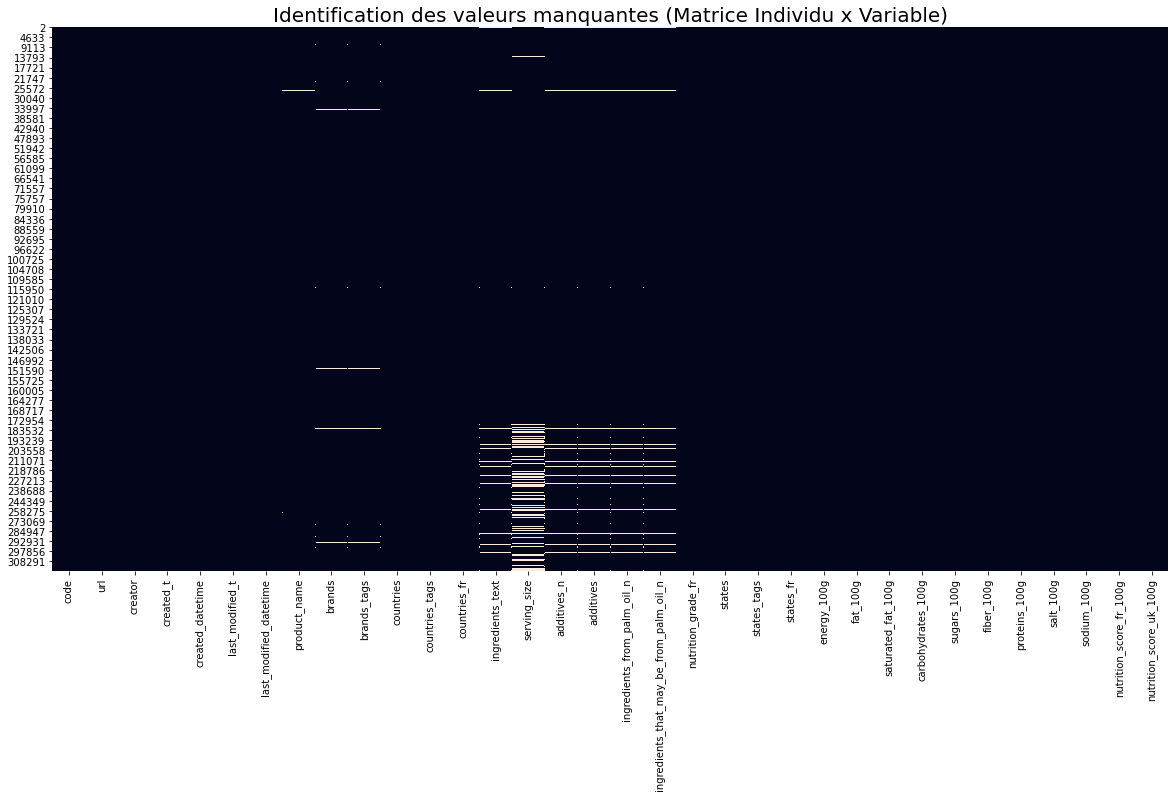

In [78]:
plt.figure(figsize=(20,10))
sns.heatmap(data_cleaned.isna(), cbar=False)
plt.title("Identification des valeurs manquantes (Matrice Individu x Variable)", fontsize=20)
plt.show()

In [79]:
missing_value_percentage_per_column = (data_cleaned.isna().sum() / data_cleaned.shape[0]).sort_values(ascending=False)
print("Pourcentage de valeurs manquantes par colonne : ")
missing_value_percentage_per_column

Pourcentage de valeurs manquantes par colonne : 


serving_size                               0.099257
additives                                  0.031580
ingredients_text                           0.031466
additives_n                                0.031466
ingredients_from_palm_oil_n                0.031466
ingredients_that_may_be_from_palm_oil_n    0.031466
brands                                     0.011731
brands_tags                                0.011731
nutrition_grade_fr                         0.001473
nutrition_score_fr_100g                    0.001473
nutrition_score_uk_100g                    0.001473
product_name                               0.001324
countries_tags                             0.000088
countries                                  0.000088
countries_fr                               0.000088
url                                        0.000000
creator                                    0.000000
created_t                                  0.000000
created_datetime                           0.000000
last_modifie

In [80]:
col_tofill = missing_value_percentage_per_column[missing_value_percentage_per_column > 0].index
col_tofill

Index(['serving_size', 'additives', 'ingredients_text', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'brands', 'brands_tags',
       'nutrition_grade_fr', 'nutrition_score_fr_100g',
       'nutrition_score_uk_100g', 'product_name', 'countries_tags',
       'countries', 'countries_fr'],
      dtype='object')

## Variables quantitatives

In [81]:
col_tofill_quanti = [col for col in col_tofill if data_cleaned[col].dtypes == "float64"]
col_tofill_quanti

['nutrition_score_fr_100g', 'nutrition_score_uk_100g']

In [82]:
for col in col_tofill_quanti:
    print(col, " : moyenne = ", data_cleaned[col].mean())
    print()

nutrition_score_fr_100g  : moyenne =  6.587566950566336

nutrition_score_uk_100g  : moyenne =  6.446220036877689



### -> Le remplissage des valeurs manquantes des variables quantitatives par la moyenne fait sens :

In [83]:
for col in col_tofill_quanti:
    data_cleaned.loc[data_cleaned[col].isnull(), col] = data_cleaned[col].mean()

## Variables qualitatives

In [84]:
col_tofill_quali = list(set(col_tofill).difference(set(col_tofill_quanti)))
col_tofill_quali

['product_name',
 'ingredients_that_may_be_from_palm_oil_n',
 'countries_tags',
 'brands',
 'countries_fr',
 'serving_size',
 'additives',
 'additives_n',
 'nutrition_grade_fr',
 'brands_tags',
 'countries',
 'ingredients_from_palm_oil_n',
 'ingredients_text']

In [85]:
for col in col_tofill_quali:
    print(data_cleaned[col].value_counts)
    print()

<bound method IndexOpsMixin.value_counts of 2                                       Peanuts
12                                Zen Party Mix
20                             Energy Power Mix
21        Antioxidant Mix - Berries & Chocolate
24                    Peanut Butter Power Chews
                          ...                  
320702           Fisherman's Friend Miel-Citron
320738                            Organic Z Bar
320742                          Natural Cassava
320751      Tartines craquantes bio au sarrasin
320763                       Thé vert Earl grey
Name: product_name, Length: 114058, dtype: category
Categories (89643, object): [' 6 carrés fourrés, saveur amande', ' 8 Beignet de crevette', ' Beef Madras', ' Biscuit Tablette Chocolat au Lait bio', ..., '有機紅豆奶', '李錦記蒜蓉', '道地百果園柑桔檸檬果汁飲品', '칠성사이다']>

<bound method IndexOpsMixin.value_counts of 2         0.0
12        0.0
20        0.0
21        0.0
24        0.0
         ... 
320702    1.0
320738    0.0
320742    0.0
320751

### Etude du remplissage par le mode (valeur la plus fréquente)

In [86]:
for col in col_tofill_quali:
    print(data_cleaned[col].mode())
    print()

0    Ice Cream
Name: product_name, dtype: category
Categories (89643, object): [' 6 carrés fourrés, saveur amande', ' 8 Beignet de crevette', ' Beef Madras', ' Biscuit Tablette Chocolat au Lait bio', ..., '有機紅豆奶', '李錦記蒜蓉', '道地百果園柑桔檸檬果汁飲品', '칠성사이다']

0    0.0
Name: ingredients_that_may_be_from_palm_oil_n, dtype: category
Categories (7, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

0    en:united-states
Name: countries_tags, dtype: category
Categories (292, object): ['en:albania,en:italy', 'en:algeria', 'en:algeria,en:belgium,en:canada,en:france,en:..., 'en:algeria,en:switzerland', ..., 'en:سلطنة-عمان', 'en:香港', 'fr:quebec', 'other-turquie']

0    Carrefour
Name: brands, dtype: category
Categories (23743, object): [' Core Meal, Core Method', ' Edward and Sons, Edward & Sons', ' Lotus Foods', ' blue diamond natural, Blue Diamond Almonds', ..., '日本口', '李錦記, Lee Kum Kee', '每日生机', '道地']

0    États-Unis
Name: countries_fr, dtype: category
Categories (292, object): ['Afrique du Sud', 'Albani

In [87]:
for col in col_tofill_quali:
    print("variable : ", col)
    print(data_cleaned[col].mode()[0])
    print()

variable :  product_name
Ice Cream

variable :  ingredients_that_may_be_from_palm_oil_n
0.0

variable :  countries_tags
en:united-states

variable :  brands
Carrefour

variable :  countries_fr
États-Unis

variable :  serving_size
30 g (2 Tbsp)

variable :  additives
 [ semolina -> en:semolina  ]  [ wheat -> en:wheat  ]  [ durum-flour -> en:durum-flour  ]  [ flour -> en:flour  ]  [ wheat -> en:wheat  ]  [ niacin -> en:e375  -> exists  -- ok  ]  [ ferrous-sulfate -> en:ferrous-sulfate  ]  [ sulfate -> en:sulfate  ]  [ iron -> en:iron  ]  [ thiamin-mononitrate -> en:thiamin-mononitrate  ]  [ mononitrate -> en:mononitrate  ]  [ riboflavin -> en:e101  -> exists  -- ok  ]  [ folic-acid -> en:folic-acid  ]  [ acid -> en:acid  ] 

variable :  additives_n
0.0

variable :  nutrition_grade_fr
d

variable :  brands_tags
carrefour

variable :  countries
US

variable :  ingredients_from_palm_oil_n
0.0

variable :  ingredients_text
Semolina (wheat), durum flour (wheat), niacin, ferrous sulfate (iron)

### -> Le remplissage des valeurs manquantes des variables qualitatives par le mode ne fait pas de sens (variables avec plusieurs modes et le premier mode ne fait pas sens)

# 6 - Suppression des colonnes inutiles : selection des variables pertinentes pour l'analyse de données

In [88]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114058 entries, 2 to 320763
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     114058 non-null  category      
 1   url                                      114058 non-null  category      
 2   creator                                  114058 non-null  category      
 3   created_t                                114058 non-null  category      
 4   created_datetime                         114058 non-null  datetime64[ns]
 5   last_modified_t                          114058 non-null  category      
 6   last_modified_datetime                   114058 non-null  datetime64[ns]
 7   product_name                             113907 non-null  category      
 8   brands                                   112720 non-null  category      
 9   brands_tags               

In [89]:
data_cleaned.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_fr,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09 14:32:37,1489069957,2017-03-09 14:32:37,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
12,0000000016872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055650,2017-03-09 10:34:10,1489055651,2017-03-09 10:34:11,Zen Party Mix,Sunridge,sunridge,US,en:united-states,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),1.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0,12.0
20,0000000018265,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055706,2017-03-09 10:35:06,1489055706,2017-03-09 10:35:06,Energy Power Mix,Sunridge,sunridge,US,en:united-states,États-Unis,"Yogurt raisins, tamari roasted almonds, organi...",40 g (0.25 cup),0.0,[ yogurt-raisins -> en:yogurt-raisins ] [ r...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1464.0,17.50,7.50,42.50,32.50,5.0,7.50,0.28448,0.112,14.0,14.0
21,0000000018289,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055654,2017-03-09 10:34:14,1489055655,2017-03-09 10:34:15,Antioxidant Mix - Berries & Chocolate,Sunridge,sunridge,US,en:united-states,États-Unis,"Chocolate stars (dehydrated cane juice, sweete...",30 g (0.25 cup),1.0,[ chocolate-stars -> en:chocolate-stars ] [...,0.0,0.0,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",2092.0,33.33,6.67,46.67,30.00,6.7,13.33,0.46482,0.183,15.0,15.0
24,0000000018357,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489138486,2017-03-10 09:34:46,1489138486,2017-03-10 09:34:46,Peanut Butter Power Chews,Sunridge,sunridge,US,en:united-states,États-Unis,"Peanut butter (dry roasted peanuts, palm oil, ...",45 g (45 GRM),3.0,[ peanut-butter -> en:peanut-butter ] [ but...,0.0,0.0,c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",1954.0,20.00,2.22,60.00,33.33,4.4,8.89,0.19812,0.078,9.0,9.0


### Variables non pertinentes pour l'analyse de données : 
- 'code', 'url' et 'creator' : inutiles pour l'analyse
- 'created_t' redondante avec 'created_datetime' -> on garde created_datetime'
- 'last_modified_t' et 'last_modified_datetime' : inutiles pour l'analyse
- 'brands_tags' et 'brands' : variables redondantes -> on garde 'brands'
- 'countries', 'countries_tags' et 'countries_fr' : variables redondantes -> on garde 'countries_fr'
- 'ingredients_text', 'serving_size' et 'additives': inutiles pour l'analyse
- 'states', 'states_tags' et 'states_fr' : inutiles pour l'analyse
- 'nutrition_score_fr_100g' et 'nutrition_score_uk_100g' redondant -> on garde 'nutrition_score_fr_100g'

In [90]:
col_to_delete = ["code", "url", "creator", "created_t", "last_modified_t", "last_modified_datetime", "brands_tags", "countries", "countries_tags", "ingredients_text", "serving_size", "additives", "states", "states_tags", "states_fr", "nutrition_score_uk_100g"]

In [91]:
data_cleaned.drop(columns=col_to_delete, inplace=True)

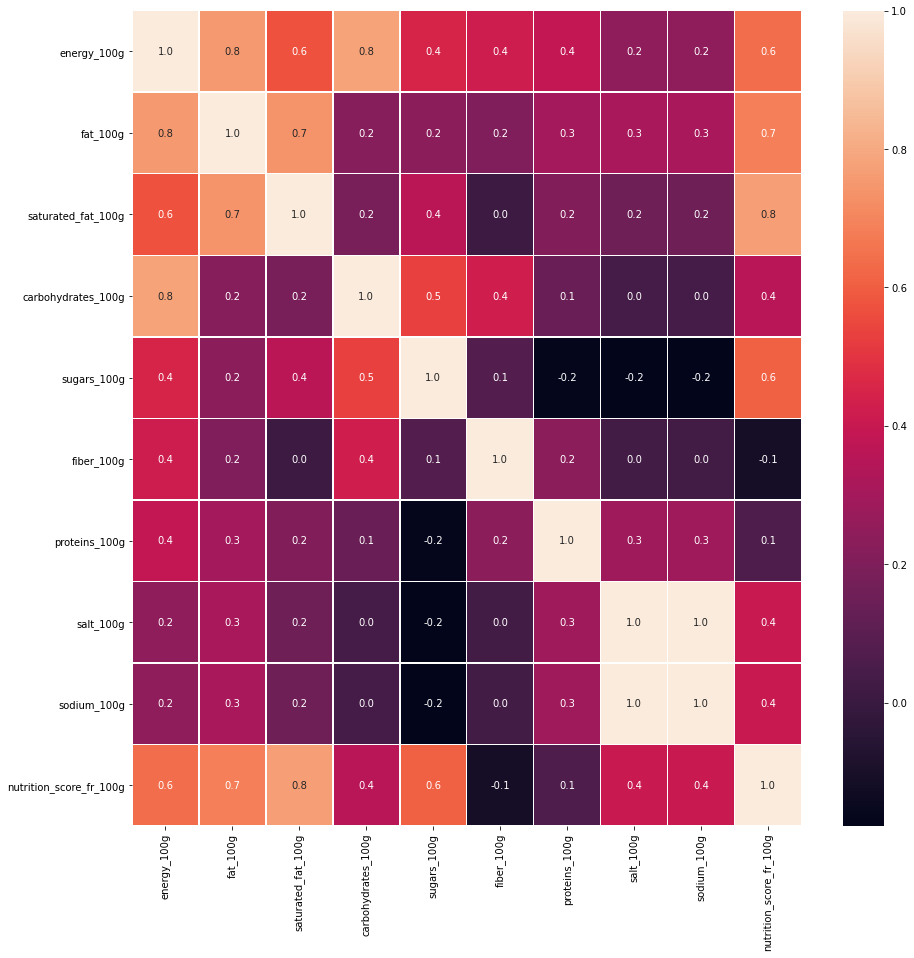

In [92]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_cleaned.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

### Remarque : 
#### Le 'nutrition_score_fr_100g' est :
####    - corrélé positivement au 'salt_100g' (sel), 'satured_fat_100g' (gras saturé) et au 'sugars_100g' (sucre) 
####    - corrélé négativement au 'fiber_100g' (fibres)
#### alors que l'on s'attendrait au contraire.
#### Cela vient du fait que l'échelle de 'nutrition_score_fr_100g' va de -15 à 40, -15 étant le meilleur score et 40 le moins bon, ce qui est contreintuitif et peut rendre les analyses difficilement compréhensibles
#### Afin de rendre les résultats plus intuitifs et plus facilement compréhensible, nous normalisons le 'nutrition_score_fr_100g' :

In [93]:
data_cleaned["nutrition_score_fr_100g"] = -data_cleaned["nutrition_score_fr_100g"]

### Corrélation après normalisation du 'nutrition_score_fr_100g'

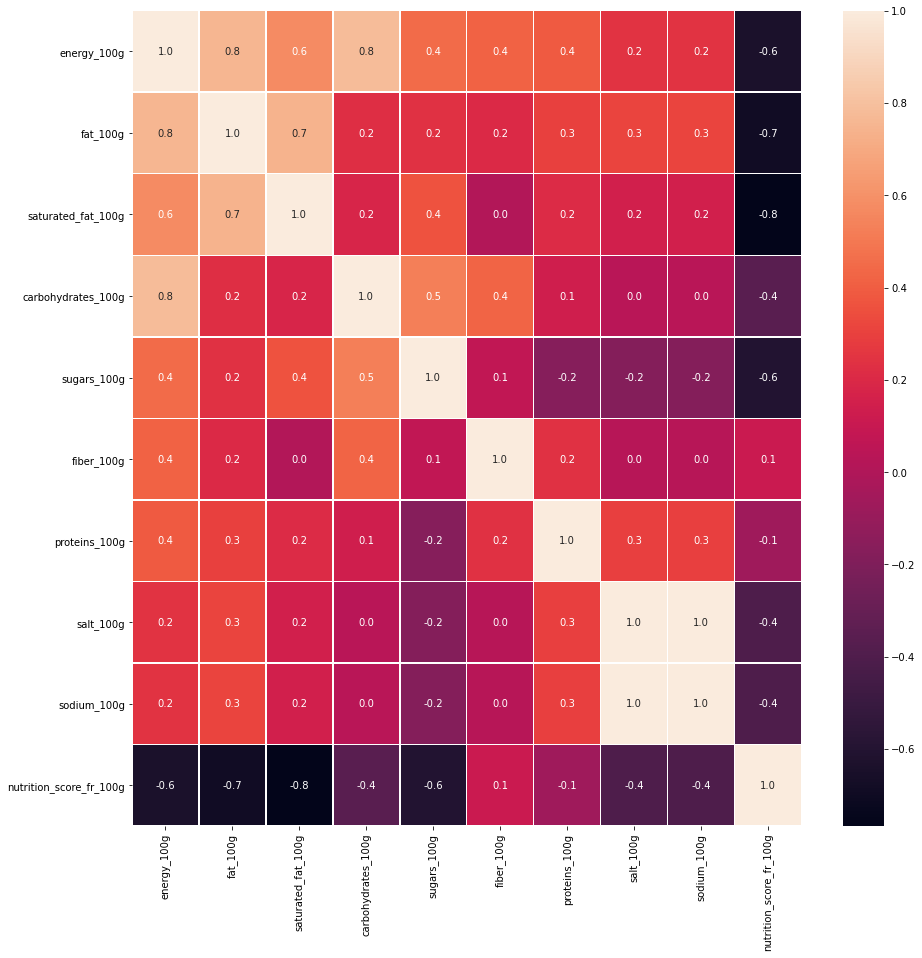

In [94]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_cleaned.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### Remarque : les variables 'salt_100g' et 'sodium_100g' ont une corrélation de 1, c'est normal car ce sont deux nutriments similaires
#### -> On supprime la variable 'sodium_100g' redondante

In [95]:
data_cleaned.drop(columns='sodium_100g', inplace=True)

# 7 - Structure des donnée pertinentes et nettoyées

In [96]:
data_cleaned.shape

(114058, 17)

In [97]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114058 entries, 2 to 320763
Data columns (total 17 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   created_datetime                         114058 non-null  datetime64[ns]
 1   product_name                             113907 non-null  category      
 2   brands                                   112720 non-null  category      
 3   countries_fr                             114048 non-null  category      
 4   additives_n                              110469 non-null  category      
 5   ingredients_from_palm_oil_n              110469 non-null  category      
 6   ingredients_that_may_be_from_palm_oil_n  110469 non-null  category      
 7   nutrition_grade_fr                       113890 non-null  category      
 8   energy_100g                              114058 non-null  float64       
 9   fat_100g                  

In [98]:
data_cleaned.head()

,created_datetime,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition_score_fr_100g
2,2017-03-09 14:32:37,Peanuts,Torn & Glasser,États-Unis,0.0,0.0,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,-0.0
12,2017-03-09 10:34:10,Zen Party Mix,Sunridge,États-Unis,1.0,0.0,0.0,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,-12.0
20,2017-03-09 10:35:06,Energy Power Mix,Sunridge,États-Unis,0.0,0.0,0.0,d,1464.0,17.50,7.50,42.50,32.50,5.0,7.50,0.28448,-14.0
21,2017-03-09 10:34:14,Antioxidant Mix - Berries & Chocolate,Sunridge,États-Unis,1.0,0.0,0.0,d,2092.0,33.33,6.67,46.67,30.00,6.7,13.33,0.46482,-15.0
24,2017-03-10 09:34:46,Peanut Butter Power Chews,Sunridge,États-Unis,3.0,0.0,0.0,c,1954.0,20.00,2.22,60.00,33.33,4.4,8.89,0.19812,-9.0


### Ajout de la colonne complémentaire 'category' = 'pnns_groups_1' pour améliorer l'analyse et répondre à l'objectif (malgré le faible nombre de données)

In [99]:
df["pnns_groups_1"].value_counts()

unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: pnns_groups_1, dtype: int64

In [100]:
data_cleaned["category"] = df["pnns_groups_1"]

In [101]:
data_cleaned["category"] = data_cleaned["category"].astype("category")

In [102]:
data_cleaned["category"].replace(to_replace='fruits-and-vegetables', value='Fruits and vegetables', inplace=True )
data_cleaned["category"].replace(to_replace='sugary-snacks', value='Sugary snacks', inplace=True )
data_cleaned["category"].replace(to_replace='cereals-and-potatoes', value='Cereals and potatoes', inplace=True )
data_cleaned["category"].replace(to_replace='salty-snacks', value='Salty snacks', inplace=True )

In [103]:
data_cleaned["category"].value_counts()

unknown                    4725
Cereals and potatoes       4472
Composite foods            3595
Sugary snacks              3319
Fruits and vegetables      2759
Beverages                  2521
Milk and dairy products    2251
Fish Meat Eggs             1376
Salty snacks               1109
Fat and sauces              934
Name: category, dtype: int64

In [104]:
data_cleaned.shape

(114058, 18)

In [105]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114058 entries, 2 to 320763
Data columns (total 18 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   created_datetime                         114058 non-null  datetime64[ns]
 1   product_name                             113907 non-null  category      
 2   brands                                   112720 non-null  category      
 3   countries_fr                             114048 non-null  category      
 4   additives_n                              110469 non-null  category      
 5   ingredients_from_palm_oil_n              110469 non-null  category      
 6   ingredients_that_may_be_from_palm_oil_n  110469 non-null  category      
 7   nutrition_grade_fr                       113890 non-null  category      
 8   energy_100g                              114058 non-null  float64       
 9   fat_100g                  

In [106]:
data_cleaned.head()

,created_datetime,product_name,brands,countries_fr,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition_score_fr_100g,category
2,2017-03-09 14:32:37,Peanuts,Torn & Glasser,États-Unis,0.0,0.0,0.0,b,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,-0.0,NaN
12,2017-03-09 10:34:10,Zen Party Mix,Sunridge,États-Unis,1.0,0.0,0.0,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,-12.0,NaN
20,2017-03-09 10:35:06,Energy Power Mix,Sunridge,États-Unis,0.0,0.0,0.0,d,1464.0,17.50,7.50,42.50,32.50,5.0,7.50,0.28448,-14.0,NaN
21,2017-03-09 10:34:14,Antioxidant Mix - Berries & Chocolate,Sunridge,États-Unis,1.0,0.0,0.0,d,2092.0,33.33,6.67,46.67,30.00,6.7,13.33,0.46482,-15.0,NaN
24,2017-03-10 09:34:46,Peanut Butter Power Chews,Sunridge,États-Unis,3.0,0.0,0.0,c,1954.0,20.00,2.22,60.00,33.33,4.4,8.89,0.19812,-9.0,NaN


# 8 - Sauvegarde des donnée pertinentes et nettoyées

In [107]:
data_cleaned.to_csv("openfoodfact_cleaned.csv", index=False)